#Contents of the Notebook : 

1. Introduction
2. Mathematical Proof of the Bootstrap resampling
3. Python Implementation 
4. Calculus concepts for the proof.

**Sources**:\
1.ISLR\
2.[Medium Article](https://towardsdatascience.com/cross-validation-and-bootstrap-sampling-2e041fbec126) 


## 1.Introduction

The bootstrap is a widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainity associated with a given estimator or statistical learning method.

Illustration of the bootstrap on a toy example in which we wish to determine the best investment allocation under a simple model.

Suppose that we wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$, respectively, where $X$ and $Y$ are reandom quantities. We will invest a fraction $α$ of our money in $X$ and will invest the remaining $1-α$ in $Y$. Since there is variability associated with the returns of these two assets, we wish to choose $α$ to minimize the total rish, or variance of our investment. In other words, we want to minimise $Var(αX+(1-α)Y))$. 

The variance of sum of two random variables. 

\begin{align}
Var(ax+by) =a^2Var(x)+b^2Var(y)+2abCov(x,y)
\end{align}

\begin{align}
&Var(αX+(1-α)Y))\\
&= \alpha^2 σ^2_x + (1-α)^2 σ^2_y + 2α(1-α)σ_{xy}\\
&=α^2 σ^2_x + (1-2α +α^2) σ^2_y + 2ασ_{xy} - 2α^2σ_{xy}\\
&=α^2 σ^2_x + σ^2_y - 2α σ^2_y + α^2 σ^2_y  + 2α σ_{xy}- 2α^2σ_{xy}
\end{align}

Differentiating w.r.t $α$ and equating it to zero, to maximize value of $α$.

\begin{align}
&2α σ^2_x - 2σ^2_y + 2α σ^2_y  + 2 σ_{xy}- 4ασ_{xy} = 0\\
&α(2 σ^2_x + 2 σ^2_y - 4σ_{xy}) = 2σ^2_y - 2 σ_{xy}\\
&α = \frac{σ^2_y -  σ_{xy}}{σ^2_x +  σ^2_y - 2σ_{xy}} \tag{1}
\end{align}

In reality, the quantities $σ_x^2,σ_y^2,σ_{xy}$ are unknown. We can compute estiates for these quantities, $\hat{σ}_x^2,\hat{σ}_y^2,\hat{σ}_{xy}$, using a data set that contains past measurements for $X$ and $Y$. We can then estimate the value of $α$ that minimizes the variance of our investment using 

\begin{align}
&\hat{α} = \frac{\hat{σ}^2_y -  \hat{σ}_{xy}}{\hat{σ}^2_x +  \hat{σ}^2_y - 2\hat{σ}_{xy}} \tag{2}
\end{align}

It is natural to wish to quantify the accuracy of our estimate of $α$. To estimate the standard deviation of $\hat{\alpha}$,we repeated the process of simulating $100$ paired observations of $X$ and $Y$, and estimating $α$ using (2), $1000$ times. 

We thereby obtained $1000$ estimates for $α$, which we can call $\hat{α_1},\hat{α_2},\ldots,\hat{\alpha}_{1000}$

For these simulations the parameters were set to $σ_x^2 = 1,σ_y^2=1.25, \text{ and } σ_{xy}=0.5$,and so we know that the true value of $α$ is $0.6$. 

The mean over all $1,000$ estimates for $α$ is: 

\begin{align}
\bar{α} = \frac{1}{1000} ∑_{r=1}^{1000} \hat{\alpha}_r = 0.5996
\end{align}

very close to $α= 0.6$, and the standard deviation of the estimates is 

\begin{align}
\sqrt{\frac{1}{1000-1} ∑_{r=1}^{1000} (\hat{α}_r - \bar{\alpha})^2} = 0.083
\end{align}

This gives us a very good idea of the accuracy of $\hat{\alpha}: SE(\hat{\alpha}) ≈ 0.083$. 

<font color='blue'>So roughly speaking, for a random sample from the population, we would expect $\hat{\alpha}$ to differ from $α$ by approximately $0.08$, on average.</font> 



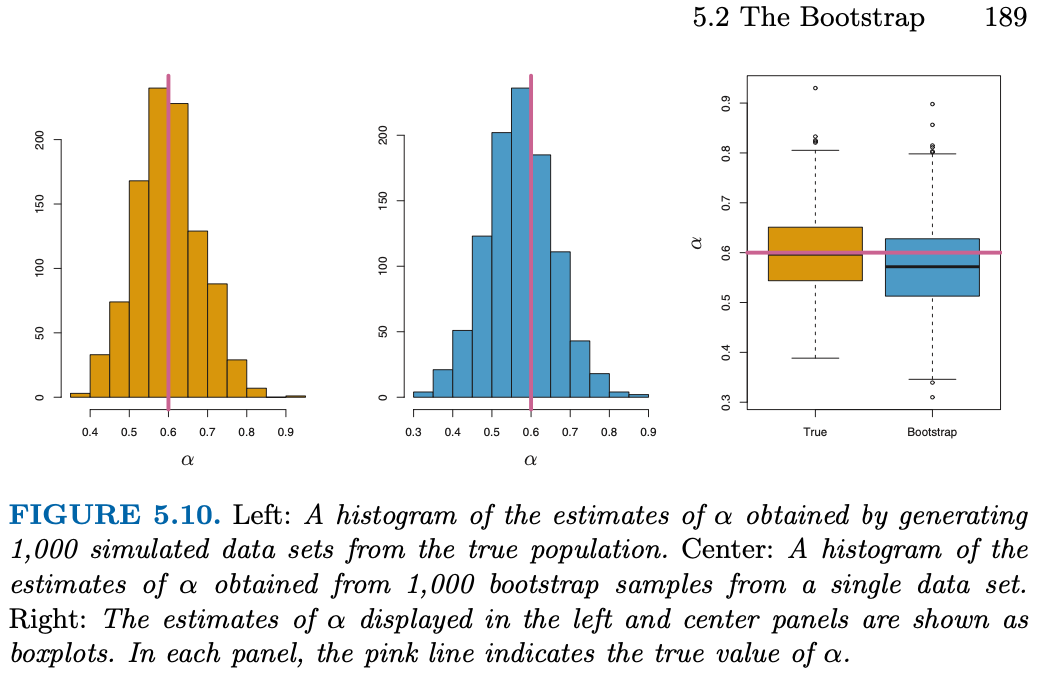

In practice, however, the procedure for estimating $SE(\hat{α})$ outlines above cannot be applied, because for read data we cannot generate new samples from the orginial population. 

However, the **bootstrap** approach allows us to use a computer to emulate the process of obtaining new sample sets, so that we can estimate the variability of $\hat{α}$ without generating additional samples. Rather than repeatedly obtaining independent data sets from the population, we instead obtain distinct data sets by repeatedly sampling observations *from the original  dataset*.

**Bootstrap Procedure**

We randomly select $n$ observations from the data set in order to produce a bootstrap data set, $Z^{*1}$. **The sampling is performed with *replacement*, which means that the same observation can occur more than one in the bootstrap data set.**

Note that if an observation is contained in $Z^{*1}$, then both its $X$ and $Y$ values are included.

We can use $Z^{*1}$ to produce a new bootstrap estimate for $α$, which we call $\hat{α}^{*1}$. This procedure is repeated $B$ times for some large values of $B$, in order to produce $B$ different bootsteap data sets, $Z^{*1},Z^{*2},\ldots,Z^{*B}$ ,and $B$ corresponding $α$ estimates, $\hat{α}^{*1},\hat{α}^{*2},\ldots,\hat{α}^{*B}$. We can compute the standard error of these bootstrap estimates using the formula. 

\begin{align}
SE_B(\hat{\alpha}) =\sqrt{\frac{1}{B-1} ∑_{r=1}^{B} \big(\hat{α}^{*r} - \frac{1}{B} ∑_{r'=1}^B \hat{\alpha}^{r'}\big)^2} \tag{3}
\end{align}

This serves as an estimate of the standard of $\hat{α}$ estimated from the original data set. 

In particular the bootstrap estimate $SE(\hat{α})$ from equation (3)# is $0.087$, is very close to the estimate $0.083$ obtained using 1000 simulated data sets. 

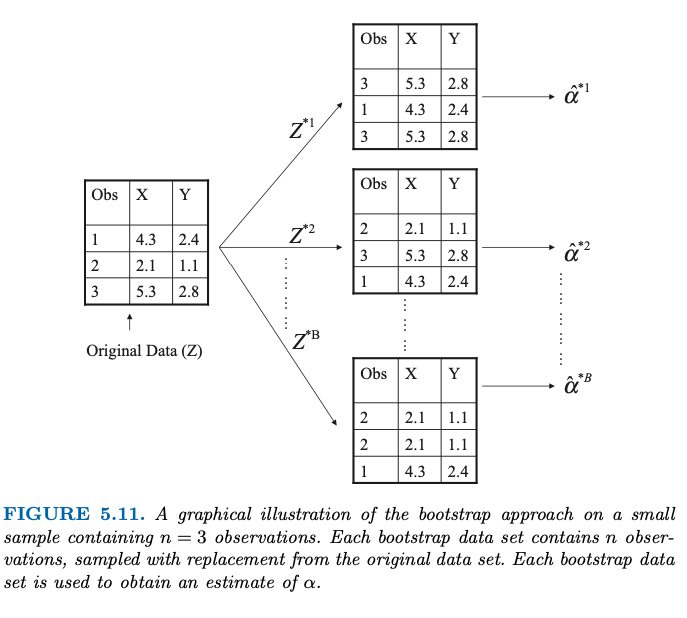

## 2. Mathematical proof of Bootstrap Sampling

“Assuming n (size of the original data) is sufficiently large, for all practical purposes there is virtually zero probability that it (the bootstrap sample) will be identical to the original ‘real’ sample.” — Wikipedia

In fact,
On average, $63.22\%$ of the original data appear in any given bootstrap sample, that is the same as saying — an average bootstrap sample omits $100–63.22=36.78\%$ of the data on the original sample.

Suppose the original data has $n$ observations and we get bootstrap sample of size $n$ from the data then:
- the probability of a given observation NOT being chosen is $(1–\frac{1}{n})$ and the probability of it being picked is $\frac{1}{n}$.
- since we are resampling n times the probability of an observation not being chosen in the n trials is $(1–\frac{1}{n})^n$.
- From calculus, as $n → ∞ $ (n grows large), this probability can be determined using the concepts of limits. That is to say,

$lim_{n→∞} (1 - \frac{1}{n})^n = \frac{1}{e} \approx \frac{1}{2.7138} ≈ 0.368
$ This is what needs to be proved. 

**Proof**: 
\begin{align*}
lim_{n→∞} (1 - \frac{1}{n})^n &= lim_{n→∞} \text{ exp }(\text{ ln } \{[1 - \frac{1}{n}]^n\})\\
&= lim_{n→∞} \text{ exp }(n \text{ ln } \{1 - \frac{1}{n}\})\\
&= \text{ exp } (lim_{n→∞} (n \text{ ln } \{1 - \frac{1}{n}\})\\
&= \text{ exp } (lim_{n→∞} \frac{\text{ ln } \{1 - \frac{1}{n}\}} {\frac{1}{n}})\\
\\
\text { Applying  L'Hopital's Rule  }\\
\\
\text{ exp } (lim_{n→∞} \frac{\text{ ln } \{1 - \frac{1}{n}\}} {\frac{1}{n}}) &= \text{ exp } \big(lim_{n→∞} \frac{\frac{d}{dn}(\text{ ln } (1 - \frac{1}{n}))} {\frac{d}{dn}\frac{1}{n}}\big)\\
&= \text{ exp } \big(lim_{n→∞} -\frac{\frac{1}{1-\frac{1}{n}}\frac{d}{dn}(\frac{1}{n})}{\frac{d}{dn}\frac{1}{n}}\big)\\
&= \text{ exp } \big(lim_{n→∞} -\frac{1}{1-\frac{1}{n}}\big)\\
&=\text{ exp } (-1)\\
&=\frac{1}{e}\\
&= 0.3622
\end{align*}

which ends our prrod with confirmation that bootstrapping eliminates 
$≈ 36.22\%$ of the data in the original sample.


## 3. Implementation 

Illustration

`Dataset` : Portfolio dataset : ISLR\
`Task` :
1. To create a function, calculate the function value, using the entire dataset. 
2. Sample 100 observations with replacement . This step is equivalent to constructing a new bootstrap dataset and recomputing $\hat{α}$ based on the new data set. 
3. Then we run the 2nd step many times, and run the function on different datasets (which are random samples of 100)
4. Then compute the Standard Deviation 
5. Then we calculate: 
""The final output comparison of original data $\hat{\alpha} = 0.5758$ and the bootstrap estimate for $SE(\hat{α})$

### Naive Attempt to Implement Bootstrap

In [2]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/data/
df = pd.read_csv("Portfolio.csv")

/content/drive/My Drive/colab_notebooks/machine_learning/data


In [16]:
##########################################################
# Function that we want to estimate
##########################################################
def func(x,y):
  return np.sum(np.var(y) - np.cov(x,y))/ np.sum(np.var(x) + np.var(y) - 2*np.cov(x,y))

##########################################################
#  # A random sample with replacement crude function
##########################################################
 
def sampling(df):
  d = pd.DataFrame(np.zeros((df.shape[0], df.shape[1])))
  for i in range(0,df.shape[0]):

   d.iloc[i,:] = df.sample(frac=0.01)
  
  return d

In [90]:
# Now we do the sampling activity for 1000 times, save the value of alphas for all 1000
# iterations and then calculate the mean of the alphas, and the standard error.
#1. Do the sampling for 1000 iterations
#2. Calculate alpha for each sample
#3. Calculate the mean alpha.
#4. Calculate the Standard Error. 

def bootstrap(df,iter):

  i = 0
  alphas = []
  #1. Sampling for no of iterations specified. 
  while i < iter:
    sample_df = sampling(df)
    #2. Calculating alpha for each of the samples.
    alpha = func(sample_df.iloc[:,0],df.iloc[:,1])
    alphas.append(alpha)
    i+=1
  
  #3. Calculate the mean alpha
  mean_alpha = np.sum(alphas)/iter 

  #4. Calculate the standard error.
  sd = np.sqrt((1/(iter-1))* np.sum((alphas - mean_alpha)**2))

  return alphas,mean_alpha,sd


In [95]:
iter =1000
lst_alpha,mean_alpha,sd = bootstrap(df,iter)

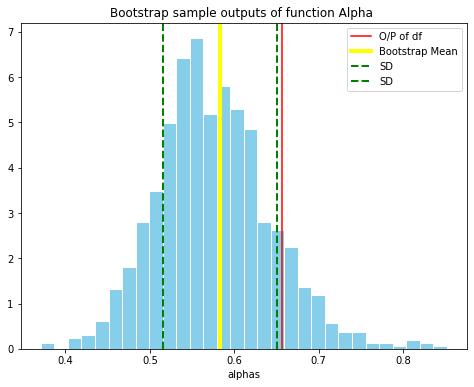

In [96]:
import matplotlib.pyplot as plt
y = lst_alpha
plt.figure(figsize=(8,6))
plt.hist(y,density=True, color='skyblue',align='left', edgecolor='white',bins=30)
plt.axvline(x=0.656592516,color='red',label='O/P of df')
plt.axvline(x=mean_alpha,color='yellow',linewidth=4,label='Bootstrap Mean')
plt.axvline(x=mean_alpha+sd, color='green', ls='--', lw=2, label='SD')
plt.axvline(x= mean_alpha-sd, color='green', ls='--', lw=2, label='SD')
plt.title("Bootstrap sample outputs of function Alpha ")
plt.xlabel('alphas')
plt.legend()
plt.show() 

## 4. Calculus Concepts 

https://brilliant.org/wiki/lhopitals-rule/

**L'Hopital's Rule**

Suppose we have one of the following cases 

$lim_{x → a} \frac{f(x)}{g(x)} = \frac{0}{0}$  or $lim_{x → a} \frac{f(x)}{g(x)} = \frac{\pm ∞}{\pm ∞}$ 

where $a$ can be any real number, infinity or negative infinity. In these cases, we have 

\begin{align}
lim_{x → a} \frac{f(x)}{g(x)} = lim_{x → a} \frac{f'(x)}{g'(x)}
\end{align}

So,L'Hopital's rule tells that if we have an indeterminate form $\frac{0}{0}$ or $\frac{\pm ∞}{\pm ∞}$, all we need to do is to differentiate the numerator and differentiate the denominator and then take the limit.

**Proof** :  

\begin{align}
\frac{f'(x)}{g'(x)} &= \frac{lim_{x→a} \frac{f(x)-f(a)}{x-a}}{lim_{x→a} \frac{g(x)-g(a)}{x-a}}\\
\\
&= lim_{x→a} \frac{\frac{f(x)-f(a)}{x-a}}{\frac{g(x)-g(a)}{x-a}}
\\
\\
&= lim_{x→a} \frac{f(x)-f(a)}{g(x)-g(a)}
\\
\\
&= lim_{x→a} \frac{f(x)-0}{g(x)-0}
\\
\\
&= lim_{x→a} \frac{f(x)}{g(x)} 
\end{align}
